In [128]:
from src.pricing.base.rate import Rate
from src.pricing.base.volatility import Volatility
from src.utility.types import Maturity

In [129]:
from src.pricing.structured_products import ReverseConvertible


rcki = ReverseConvertible(rate= Rate(0.02),
        maturity= Maturity(1),
        spot_price=100,
        volatility= Volatility(0.20),
        dividend=0.035,
        coupon=0.105,
    )
print(rcki.compute_price())
rcki.compute_greeks()

99.81086084685153


{'delta': -0.49002748180476197,
 'gamma': 0.019940881520819093,
 'theta': -2.8320433606586777,
 'rho': -0.5780664717525703,
 'vega': 0.39881763041638185}

In [130]:
from src.pricing.structured_products import OutperformerCertificate

outc = OutperformerCertificate(
        Rate(0.02),
        Maturity(maturity_in_years=2),
        spot_price=100,
        volatility=Volatility(0.20),
        participation=1.65,
        dividend=0.035,
)

print(outc.compute_price())
outc.compute_greeks()

93.23938199059482
6.035436462589191
99.27481845318401


{'delta': 1.3341661710739066,
 'gamma': 0.009162352472460908,
 'theta': -2.3713417369686565,
 'rho': 0.5388712424764749,
 'vega': 0.3664940988984363}

# Pricing Options

## Vanilla Options


In [131]:
from src.pricing.vanilla_options import VanillaOption


opt = VanillaOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="call",
)

opt.compute_price()

5.733960540842027

In [132]:
opt2 = VanillaOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="put",
)

opt2.compute_price()

11.36210024410454

## Option digit


In [133]:
from src.pricing.binary_options import BinaryOption


bin_opt = BinaryOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="call",
)
bin_opt.compute_price()

0.3406307870551669

In [134]:
bin_opt2 = BinaryOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="put",
)
bin_opt2.compute_price()

0.6196250284290377

# Option strategies

## Straddle


In [135]:
# TODO: Frontend streamlit (Matthieu)
# TODO: API (Baptiste)
# TODO: Produit Structurés Outperformer/Reversible conversible (Hugo)
# TODO: Strategies option (Matthieu/Naim)
# TODO: Options barrières MC (Naim)
# TODO: Surface vol class (Hugo)
# TODO: Calculer les grecques (Hugo)

In [136]:
from src.pricing.option_strategies import StraddleStrategy


straddle = StraddleStrategy(
    100,
    140,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
)
straddle.compute_price()

35.89739104545381

In [137]:
straddle.compute_greeks()

{'delta': -0.8289138959141087,
 'gamma': 0.015527841773021482,
 'theta': 1.6459828708702913,
 'vega': 0.3148701248418245,
 'rho': -1.204386248123767}

## Strangle strategy


In [138]:
from src.pricing.option_strategies import StrangleStrategy


straddle = StrangleStrategy(
    100,
    90,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
)
straddle.compute_price()

27.49704205763158

# Pricing Bonds

## ZC


In [139]:
from src.pricing.fixed_income import ZeroCouponBond


zc_bond = ZeroCouponBond(
    Rate(rate=0.03, rate_type="continuous"), Maturity(maturity_in_days=365), nominal=100
)


zc_bond.compute_price()

97.00412654712278

## Vanilla Bond

using a rate curve interpolation


In [140]:
from src.pricing.fixed_income import Bond


rate_curve = {
    Maturity(1 / 365): 0.02,
    Maturity(1 / 12): 0.01,
    Maturity(3 / 12): 0.02,
    Maturity(6 / 12): 0.04,
    Maturity(1): 0.06,
    Maturity(3): 0.07,
    Maturity(5): 0.08,
    Maturity(10): 0.1,
}
bond = Bond(
    Rate(
        rate_curve=rate_curve,
        rate_type="continuous",
    ),
    Maturity(maturity_in_days=365 * 5),
    nominal=100,
    coupon_rate=0.02,
    nb_coupon=10,
)

bond.compute_price()

75.11549887185251

Text(0.5, 1.0, 'Rate curve')

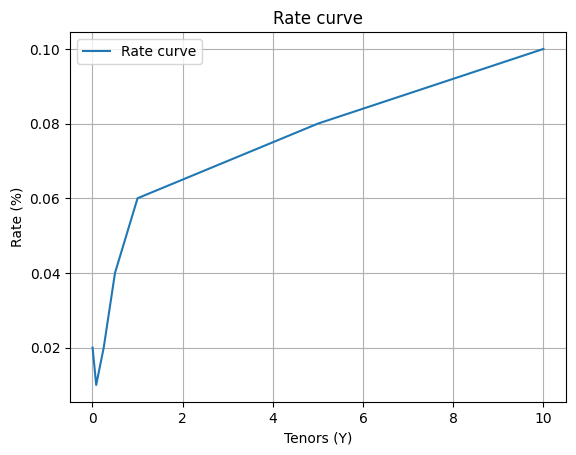

In [141]:
from matplotlib import pyplot as plt


plt.plot(
    [mat.maturity_in_years for mat in rate_curve.keys()],
    [r for r in rate_curve.values()],
    label="Rate curve",
)
plt.xlabel("Tenors (Y)")
# plt.xscale('log')
plt.ylabel("Rate (%)")
plt.grid()
plt.legend()
plt.title("Rate curve")

## Barrier Options


In [142]:
# Maturity en première clé et Strike en seconde
d1 = {
    "1.0": {
        "0.9": 0.14,
        "1.0": 0.10,
        "1.1": 0.12,
    },
    "1.5": {
        "0.9": 0.13,
        "1.0": 0.09,
        "1.1": 0.13,
    },
    "2.0": {
        "0.9": 0.10,
        "1.0": 0.1,
        "1.1": 0.08,
    },
}

In [143]:
from itertools import product

volatility_surface_example = {}
for comb in product(map(float, d1.keys()), map(float, list(d1.items())[0][-1].keys())):
    volatility_surface_example[comb] = d1.get(str(comb[0])).get(
        str(comb[-1]), int(comb[-1])
    )

volatility_surface_example

{(1.0, 0.9): 0.14,
 (1.0, 1.0): 0.1,
 (1.0, 1.1): 0.12,
 (1.5, 0.9): 0.13,
 (1.5, 1.0): 0.09,
 (1.5, 1.1): 0.13,
 (2.0, 0.9): 0.1,
 (2.0, 1.0): 0.1,
 (2.0, 1.1): 0.08}

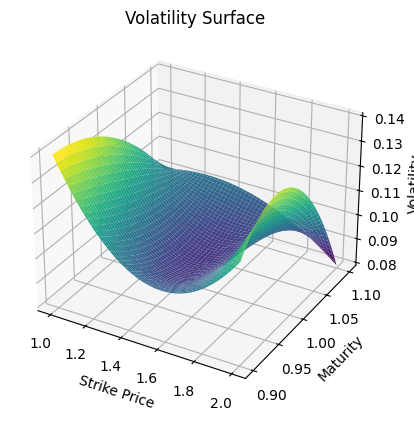

0.13640000000000005


In [144]:
from src.pricing.base.volatility import Volatility


volatility_object = Volatility(volatility_surface=volatility_surface_example)

volatility_object.print_surface()

print(volatility_object.get_volatility(1.3, 0.75))

In [145]:
from src.pricing.barrier_options import BarrierOption
import random
import numpy as np

random.seed(40)
np.random.seed(40)

barrier_option1 = BarrierOption(
    spot_price=80,
    strike_price=100,
    maturity=Maturity(maturity_in_days=365),
    rate=Rate(rate=0.04),
    volatility=Volatility(volatility=0.20),
    option_type="put",
    barrier_level=60,
    barrier_type="ki",
    barrier_direction="down",
)

price1 = barrier_option1.compute_price(num_paths=30000, num_steps=1000)
print(f"Le prix estimé de l'option barrière est: {price1}")

Le prix estimé de l'option barrière est: 4.795409281480627


In [146]:
from src.pricing.barrier_options import BarrierOption
import random
import numpy as np

random.seed(40)
np.random.seed(40)

barrier_option2 = BarrierOption(
    spot_price=80,
    strike_price=100,
    maturity=Maturity(maturity_in_days=365),
    rate=Rate(rate=0.04),
    volatility=Volatility(volatility=0.20),
    option_type="put",
    barrier_level=60,
    barrier_type="ko",
    barrier_direction="down",
)

price2 = barrier_option2.compute_price(num_paths=30000, num_steps=1000)
print(f"Le prix estimé de l'option barrière est: {price2}")

Le prix estimé de l'option barrière est: 12.951534044376125


In [147]:
parity = VanillaOption(spot_price=80
                     ,strike_price=100,
                     maturity=Maturity(maturity_in_days=365),
                     rate=Rate(rate=0.04),
                     volatility=Volatility(volatility=0.20),
                        option_type="put")
parity = test.compute_price()
print(f"Le prix de l'option vanille est: {parity}")

Le prix de l'option vanille est: 17.77127139749647
